In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coupe_1 = ['2.B53', '2.B54']
coupe_2 = ['2.B55', '2.B56']
coupe_3 = ['2.B57', '2.B58']
coupe_4 = ['2.B59', '2.B60']

coupes = [coupe_1, coupe_2, coupe_3, coupe_4]

kamer_1 = 'Data_clean/Alta_sensors/2P01_combined.xlsx'
kamer_2 = 'Data_clean/Alta_sensors/2P02_combined.xlsx'
kamer_3 = 'Data_clean/Alta_sensors/2P03_combined.xlsx'
kamer_4 = 'Data_clean/Alta_sensors/2P04_combined.xlsx'

kamers = [kamer_1, kamer_2, kamer_3, kamer_4]

Kamer P01 has 6034 datapoints with 146.33 as mean
Kamer P02 has 9836 datapoints with 154.71 as mean
Kamer P03 has 6740 datapoints with 159.58 as mean
Kamer P04 has 9810 datapoints with 179.55 as mean


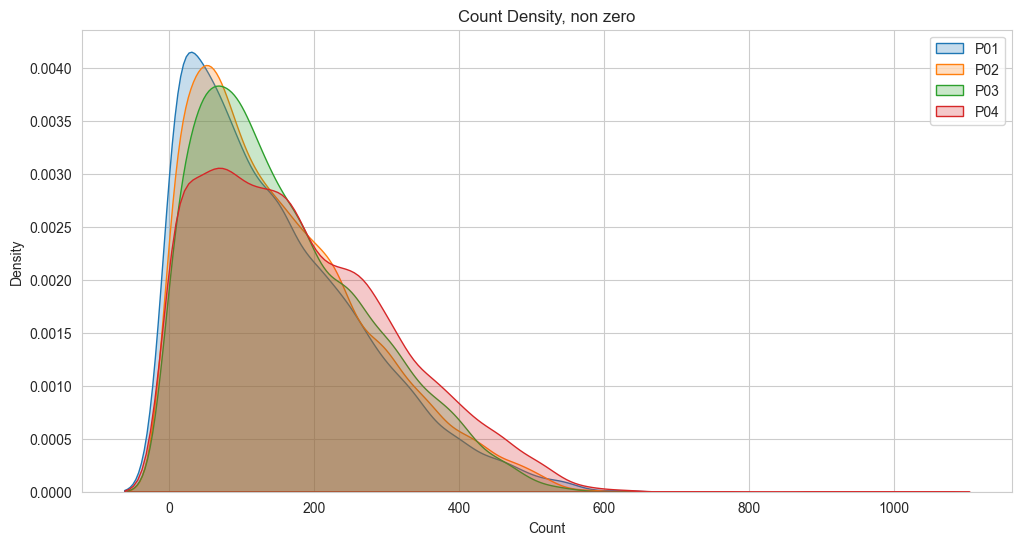

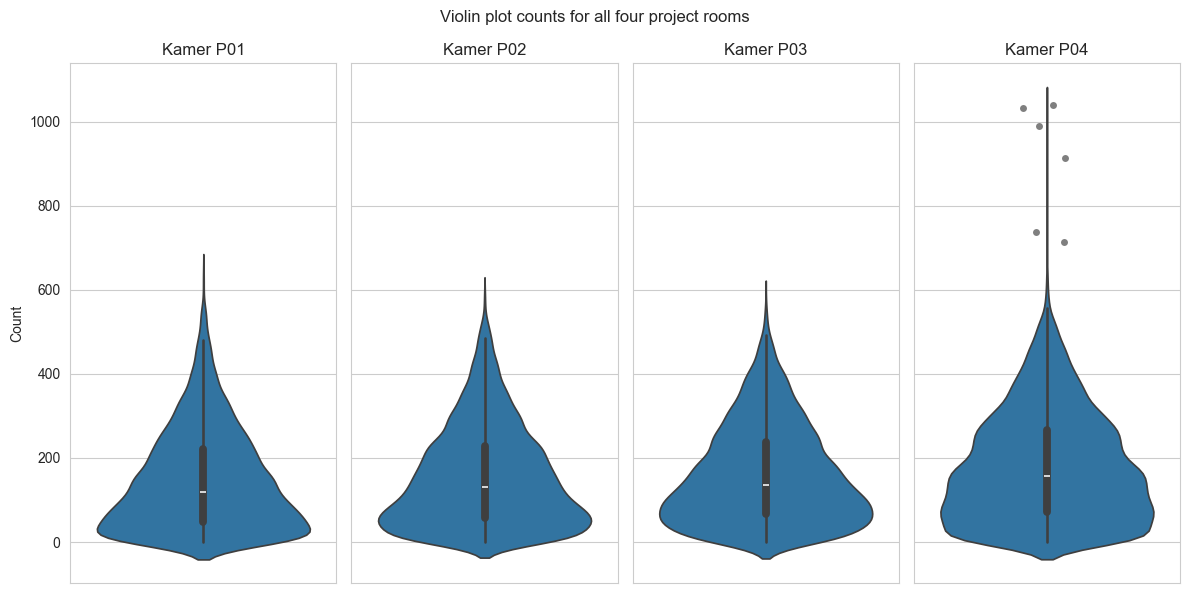

In [3]:
plt.figure(figsize=(12, 6))
for kamer in kamers:
    df = pd.read_excel(kamer)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Count'] != 0]
    print(f"Kamer {kamer[25:28]} has {len(df)} datapoints with {df['Count'].mean():.2f} as mean")
    sns.kdeplot(df['Count'], label=kamer[25:28], fill=True)
    
plt.title('Count Density, non zero')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, len(kamers), figsize=(12, 6), sharey=True)
for i, kamer in enumerate(kamers):
    df = pd.read_excel(kamer)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Count'] != 0]
    sns.violinplot(y='Count', data=df, ax=axes[i])
    axes[i].set_title(f'Kamer {kamer[25:28]}')
    axes[i].set_ylabel('Count')
    df_above_700 = df[df['Count'] > 700]
    sns.stripplot(y='Count', data=df_above_700, ax=axes[i], color='black', alpha=0.5)

plt.suptitle('Violin plot counts for all four project rooms')
plt.tight_layout()
plt.show()


In [4]:
df1 = pd.read_excel('Data_clean/Locus_sensors/2.B53_processed.xlsx')
df2 = pd.read_excel('Data_clean/Locus_sensors/2.B54_processed.xlsx')

df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df1 = df1[(df1['Date'].dt.hour >= 8) & (df1['Date'].dt.hour <= 24)]
df2 = df2[(df2['Date'].dt.hour >= 8) & (df2['Date'].dt.hour <= 24)]
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)

df1_resampled = df1.resample('5min').sum().fillna(0)
df2_resampled = df2.resample('5min').sum().fillna(0)

combined_df = pd.merge(df1_resampled, df2_resampled, left_index=True, right_index=True, suffixes=('_file1', '_file2'))

combined_df.reset_index(inplace=True)

combined_df.rename(columns={'index': 'Date'}, inplace=True)

combined_df.to_excel('Data_clean/Locus_sensors/coupe1_combined.xlsx')

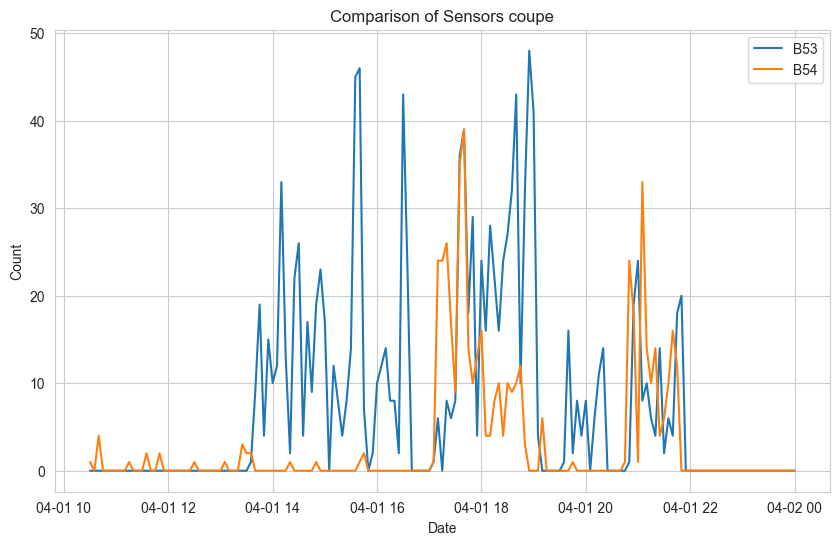

In [5]:
start_date = '2024-04-01'  
end_date = '2024-04-02' 
week_data = combined_df[(combined_df['Date'] >= start_date) & (combined_df['Date'] <= end_date)]


plt.figure(figsize=(10, 6))
plt.plot(week_data['Date'], week_data['Count_file1'], label='B53')
plt.plot(week_data['Date'], week_data['Count_file2'], label='B54')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparison of Sensors coupe')
plt.legend()
plt.grid(True)
plt.show()

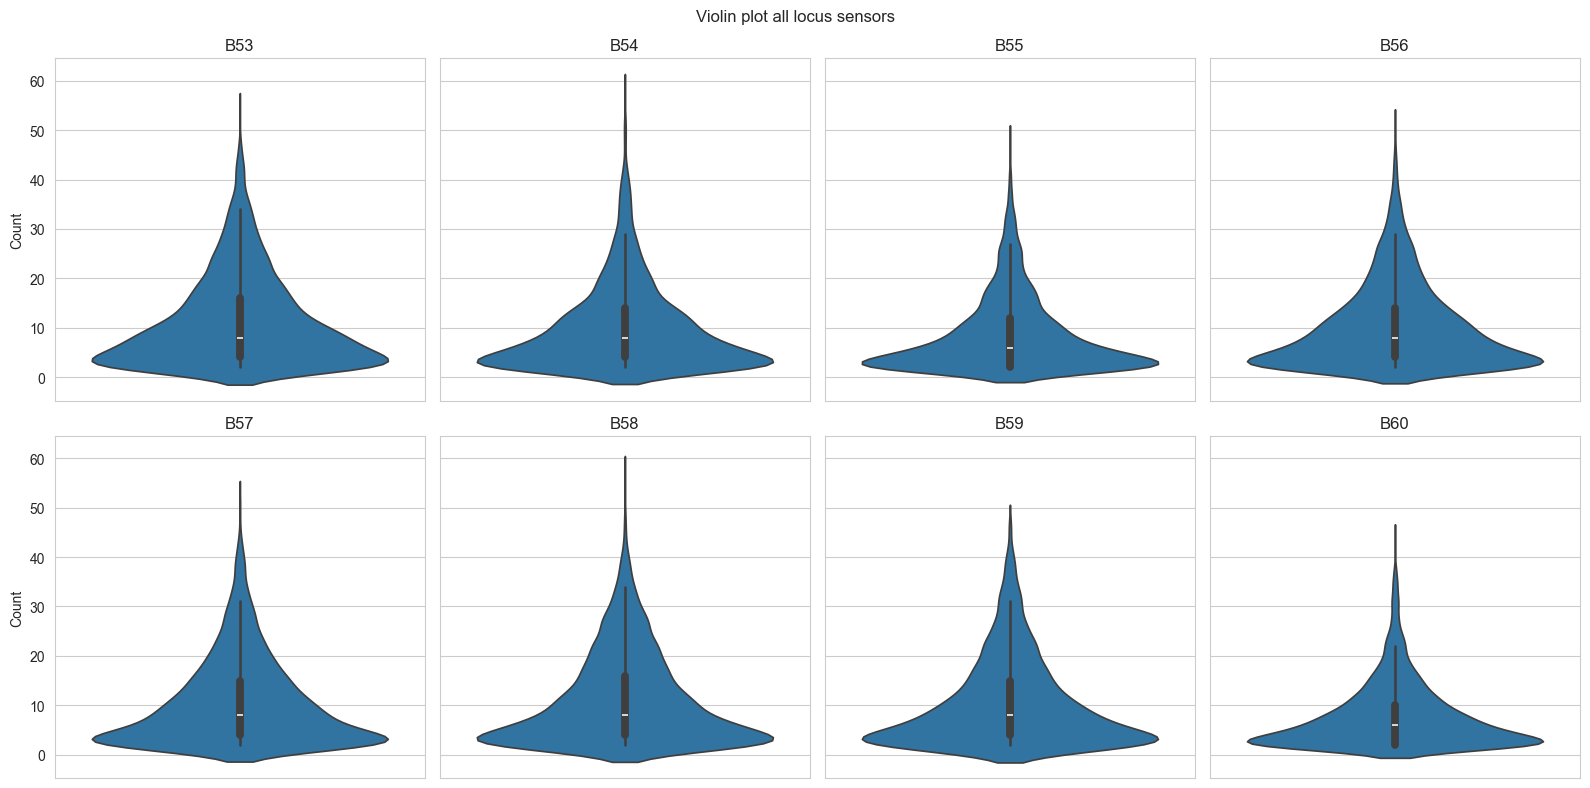

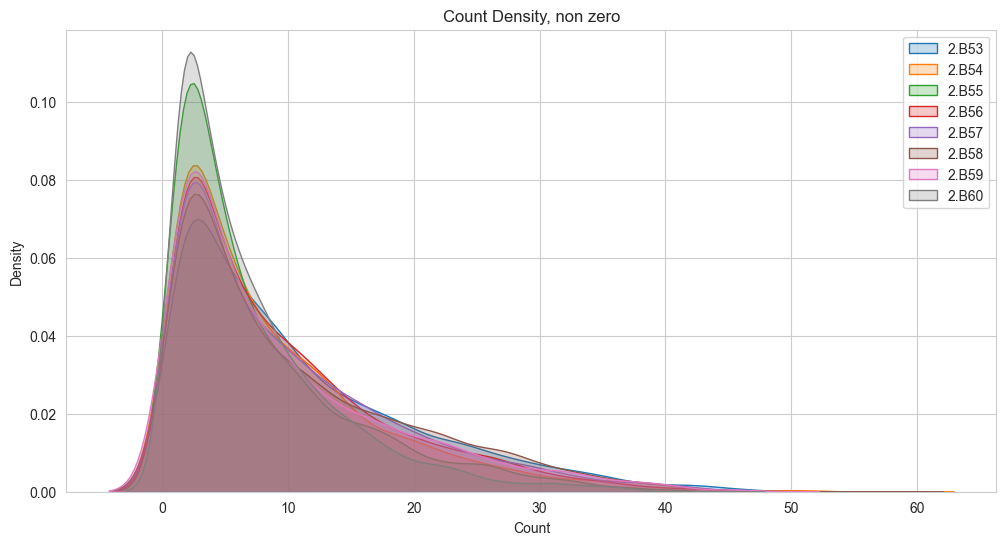

In [6]:
file_paths = ['Data_clean/Locus_sensors/2.B53_processed.xlsx', 'Data_clean/Locus_sensors/2.B54_processed.xlsx',
              'Data_clean/Locus_sensors/2.B55_processed.xlsx', 'Data_clean/Locus_sensors/2.B56_processed.xlsx',
              'Data_clean/Locus_sensors/2.B57_processed.xlsx', 'Data_clean/Locus_sensors/2.B58_processed.xlsx',
              'Data_clean/Locus_sensors/2.B59_processed.xlsx', 'Data_clean/Locus_sensors/2.B60_processed.xlsx',]
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for i, file_path in enumerate(file_paths):
    df = pd.read_excel(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    
    df = df[df['Count'] >=2]

    
    sns.violinplot(y='Count', data=df, ax=axes[i])
    axes[i].set_title(f'{file_path[27:30] }')
    axes[i].set_ylabel('Count')

plt.suptitle('Violin plot all locus sensors')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

for file_path in file_paths:
    df = pd.read_excel(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Count'] != 0]  
    sns.kdeplot(df['Count'], label=file_path[25:30], fill=True)
    
plt.title('Count Density, non zero')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


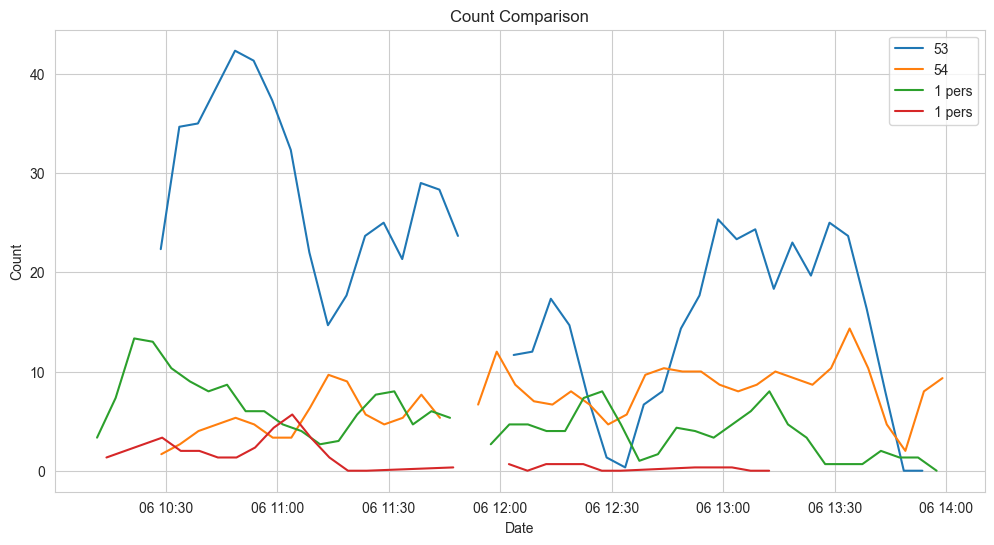

In [7]:
df1 = pd.read_excel('Data_clean/Locus_sensors/2.B53_testperiod_processed.xlsx')
df2 = pd.read_excel('Data_clean/Locus_sensors/2.B54_testperiod_processed.xlsx')
df3 = pd.read_excel('Data_clean/Locus_sensors/2.B55_testperiod_processed.xlsx')
df4 = pd.read_excel('Data_clean/Locus_sensors/2.B57_testperiod_processed.xlsx')

df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])

df1 = df1[(df1['Date'].dt.hour >= 10) & (df1['Date'].dt.hour <= 13)]
df2 = df2[(df2['Date'].dt.hour >= 10) & (df2['Date'].dt.hour <= 13)]
df3 = df3[(df3['Date'].dt.hour >= 10) & (df3['Date'].dt.hour <= 13)]
df4 = df4[(df4['Date'].dt.hour >= 10) & (df4['Date'].dt.hour <= 13)]

window_size = 3
df1['Smoothed_Count'] = df1['Count'].rolling(window=window_size).mean()
df2['Smoothed_Count'] = df2['Count'].rolling(window=window_size).mean()
df3['Smoothed_Count'] = df3['Count'].rolling(window=window_size).mean()
df4['Smoothed_Count'] = df4['Count'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(df1['Date'], df1['Smoothed_Count'], label='53')
plt.plot(df2['Date'], df2['Smoothed_Count'], label='54')
plt.plot(df3['Date'], df3['Smoothed_Count'], label='1 pers')
plt.plot(df4['Date'], df4['Smoothed_Count'], label='1 pers')

plt.title('Count Comparison')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()